In [1]:
from table import *
import matplotlib.pyplot as plt
from threshold import *
from generate_table_workloads import *
from matplotlib.lines import Line2D
import sys, os
counter = 0
def generate_input_file(attack, seed):
    global honest_size, counter
    filename = 'input' + str(counter) + '.csv'
    if(attack == 'none'):
        generate_workload(honest = honest_size, malicious = 0, seed=seed, output_filename = filename)
    elif(attack == 'impatient'):
        generate_impatient(size = honest_size, seed=seed, output_filename = filename)
    elif(attack == 'spam'):
        generate_workload(honest= honest_size, malicious = malicious_size, attacker_ip_num = attacker_ip_id_num, attacker_id_num = malicious_size, attack_topic = 'None', seed=seed, output_filename = filename)
    elif(attack == 'topic_popular'):
        generate_workload(honest= honest_size, malicious = malicious_size, attacker_ip_num = attacker_ip_id_num, attacker_id_num = malicious_size, attack_topic = 't1', seed=seed, output_filename = filename)
    elif(attack == 'topic_unpopular'):
        generate_workload(honest= honest_size, malicious = malicious_size, attacker_ip_num = attacker_ip_id_num, attacker_id_num = malicious_size, attack_topic = 't12', seed=seed, output_filename = filename)
    else:
        print("Unknown attack", attack)
        quit(-1)
    counter += 1
    return filename

def restore_default():
    global ad_lifetime, input_file, capacity, honest_size, malicious_size, occupancy_power, ip_id_power, topic_power, base_multiplier, attacker_ip_id_num, attacker_id_num
    ad_lifetime = 1000
    capacity = 1000
    honest_size = 500
    malicious_size = 2500
    occupancy_power = 1
    ip_id_power = 1
    topic_power = 5
    attacker_ip_id_num = 200
    base_multiplier = 10


runtime = 50 * 1000
sys.stdout = open(os.devnull, 'w')
restore_default()
filename = generate_input_file('spam', seed=1)

#filename = 'test.csv'




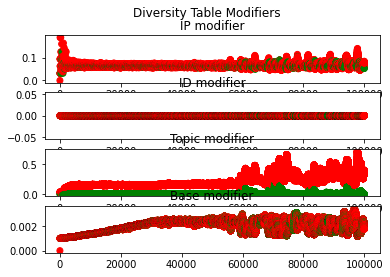

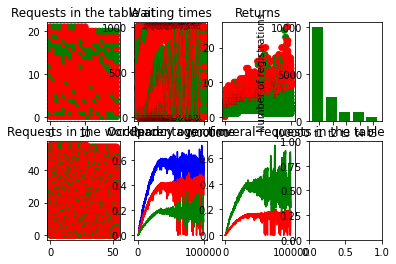

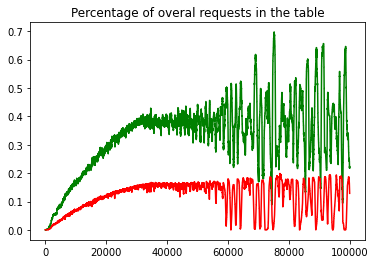

In [2]:
table = DiversityTable(capacity, ad_lifetime, occupancy_power = occupancy_power, ip_id_power = ip_id_power, topic_power = topic_power, base_multiplier = base_multiplier, tree='default')
table.load(filename)
table.display(runtime - 1)
table.run(runtime)
plt.show()

In [3]:
table = DiversityTable(capacity, ad_lifetime, occupancy_power = occupancy_power, ip_id_power = ip_id_power, topic_power = topic_power, base_multiplier = base_multiplier, tree='michal')
table.load(filename)
table.display(runtime - 1)
table.run(runtime)
plt.show()

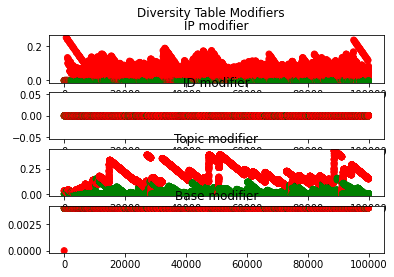

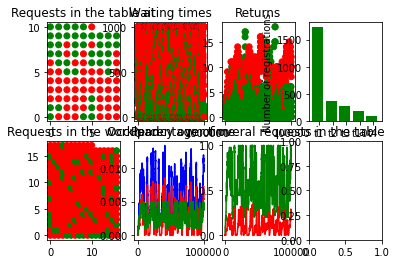

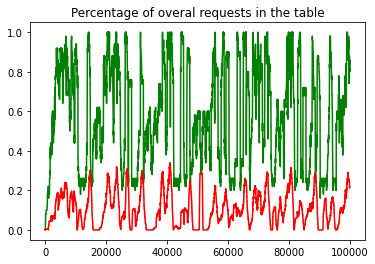

In [ ]:
table = DiversityTable(capacity, ad_lifetime, occupancy_power = occupancy_power, ip_id_power = ip_id_power, topic_power = topic_power, base_multiplier = base_multiplier, tree='onur')
table.load(filename)
table.display(runtime - 1)
table.run(runtime)
plt.show()